In [248]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt




In [249]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"DEVICE = {DEVICE}")

DEVICE = cuda


In [250]:
# Setup DATSET

bDownloadDataSet = False

train_data = datasets.FashionMNIST(root="data", train=True, download=bDownloadDataSet, transform=torchvision.transforms.ToTensor(), target_transform=None)

test_data = datasets.FashionMNIST(root="data", train=False, download=bDownloadDataSet, transform=torchvision.transforms.ToTensor(), target_transform=None)


In [251]:
len(train_data), len(test_data)


(60000, 10000)

In [252]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [253]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [254]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [255]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [256]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]") 
print(f"Image label: {train_data.classes[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Text(0.5, 1.0, '9')

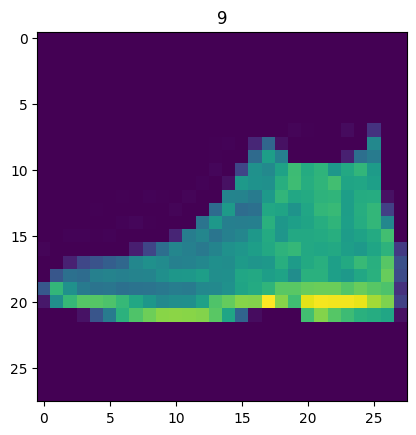

In [257]:
image, label = test_data[0]
plt.imshow(image.squeeze())
plt.title(label)

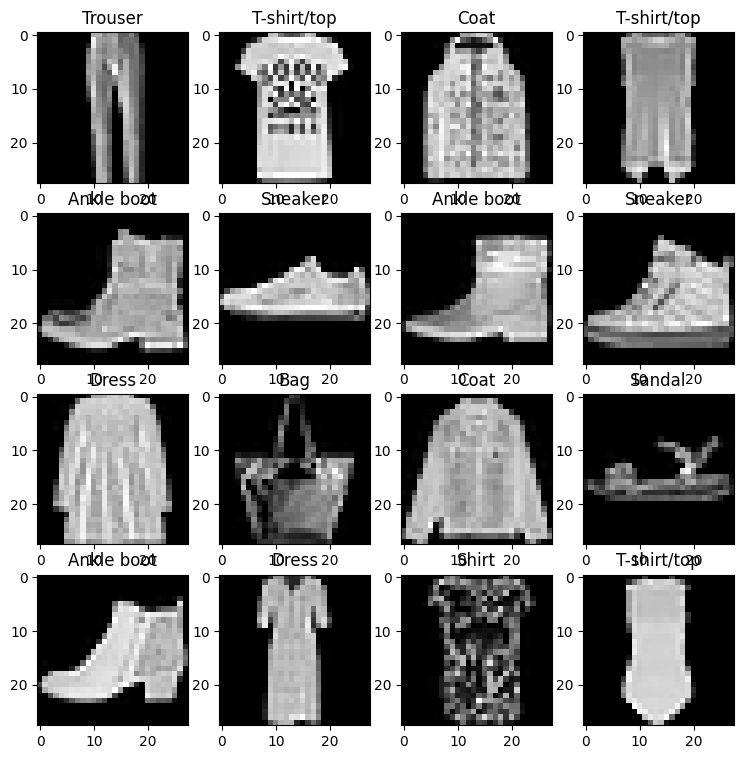

In [258]:
#plot random images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(low=0, high=len(train_data), size=(1,)).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label]);

In [259]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

In [260]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")
    

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000012C1275AE10>, <torch.utils.data.dataloader.DataLoader object at 0x0000012BC05D13A0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [261]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])


Label: 3, label size: torch.Size([])


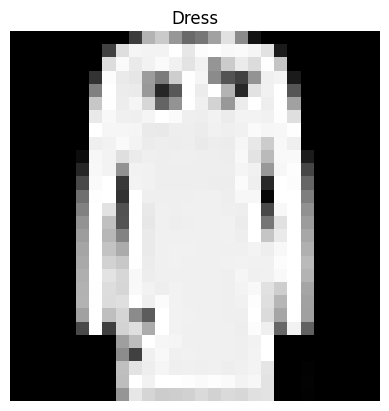

In [262]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [263]:
#Code execution time check function
from timeit import default_timer as timer 
def print_train_time(start: float,
                     end: float, 
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time
     

In [264]:
class FashionMNIST_Model_V1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten input to single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)


In [265]:
torch.manual_seed(42)

model_1 = FashionMNIST_Model_V1(
    input_shape=784, # 28*28 res image
    hidden_units=10,
    output_shape=len(train_data.classes)).to(DEVICE)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [266]:
loss_fn =  nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.001)

In [267]:
from torchmetrics import Accuracy
metric = Accuracy(task="multiclass", num_classes=10).to(DEVICE)
    

In [268]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = DEVICE):
    
    train_accTorchMetric = 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        
        # Put data on target device 
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)

        train_accTorchMetric += metric(y_pred.argmax(dim=1), y)
       
        #Optimizer zero grad
        optimizer.zero_grad()

        #Loss backward
        loss.backward()

        #Optimizer step 
        optimizer.step()
    train_accTorchMetric /= len(train_dataloader)
    print (f"TrainAccuracy:: {train_accTorchMetric *100:.2f}%")



In [269]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              device: torch.device = DEVICE):
   
    test_accTorchMetric = 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)

            test_pred = model(X)
                      
            test_accTorchMetric += metric(test_pred.argmax(dim=1), y)

        test_accTorchMetric /= len(test_dataloader)
        print(f"TestAccuracy:: {test_accTorchMetric * 100:.2f}%")
              



In [270]:
from tqdm.auto import tqdm 

# torch.manual_seed(42)

# from timeit import default_timer as timer
# train_time_start_on_gpu = timer()

# epochs = 10

# for epoch in tqdm(range(epochs)):
#     print(f"--------------\n Epoch: {epoch}")
#     train_step(model=model_1,
#                data_loader=train_dataloader,
#                loss_fn=loss_fn,
#                optimizer=optimizer,
#                device=DEVICE)
    
#     test_step(model=model_1,
#               data_loader=test_dataloader,
#               loss_fn=loss_fn,
#               device=DEVICE)
    
# train_time_end_on_gpu = timer()

#print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=DEVICE)

In [271]:
class FashionMNIST_Model_V2(nn.Module):
    def __init__(self, input_shape, hidde_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidde_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidde_units, out_channels=hidde_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidde_units, out_channels=hidde_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidde_units, out_channels=hidde_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidde_units*7*7, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [272]:
torch.manual_seed(42)

model_2 = FashionMNIST_Model_V2(input_shape=1, hidde_units=10, output_shape=len(test_data.classes)).to(DEVICE)

In [273]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.001)

In [274]:
epochs = 3

train_time_start_on_gpu = timer()

for epoch in tqdm(range(epochs)):
    train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=DEVICE)

    test_step(model=model_2, data_loader=test_dataloader, device=DEVICE)


train_time_end_on_gpu = timer()

print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=DEVICE)


  0%|          | 0/3 [00:00<?, ?it/s]

TrainAccuracy:: 79.94%
TestAccuracy:: 85.10%


 33%|███▎      | 1/3 [00:12<00:25, 12.52s/it]

TrainAccuracy:: 86.92%
TestAccuracy:: 87.23%


 67%|██████▋   | 2/3 [00:25<00:12, 12.72s/it]

TrainAccuracy:: 88.26%
TestAccuracy:: 88.33%


100%|██████████| 3/3 [00:38<00:00, 12.87s/it]


Train time on cuda: 38.617 seconds


38.61736849999943

In [275]:

def collect_test_preds(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              device: torch.device = DEVICE):
    y_test_preds = []

    model.eval()
    test_accTorchMetric = 0
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)

            test_pred = model(X)
            test_accTorchMetric += metric(test_pred.argmax(dim=1), y)

            # Turn predictions from logits -> prediction probabilities -> prediction labels
            y_test_preds.append(torch.softmax(test_pred.squeeze(), dim=0).argmax(dim=1))
        test_accTorchMetric /= len(test_dataloader)
        print(f"TestAccuracy:: {test_accTorchMetric * 100:.2f}%")
    return y_test_preds 

y_test_preds = collect_test_preds(model_2, test_dataloader)    
y_test_preds = torch.cat(y_test_preds)

y_test_preds.size() , test_data.targets.size()

TestAccuracy:: 88.30%


(torch.Size([10000]), torch.Size([10000]))

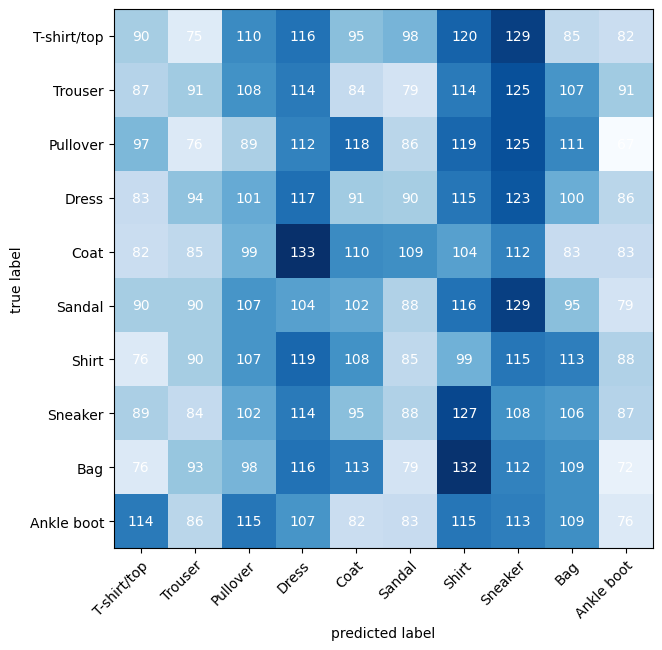

In [276]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

targets = test_data.targets.to("cpu")
y_test_preds = y_test_preds.to("cpu")

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(train_data.classes))
confmat_tensor = confmat(preds=y_test_preds, target=targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=train_data.classes,
    figsize=(10, 7)
)